## EE 769 Course Project

In [2]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.manual_seed(42)
np.random.seed(42)

### Downloading the Data Set

In [3]:
from keras.datasets import mnist
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

2024-04-06 14:59:25.583064: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-06 14:59:25.584976: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-06 14:59:25.621216: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 14:59:25.621245: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 14:59:25.621261: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

Label: 5


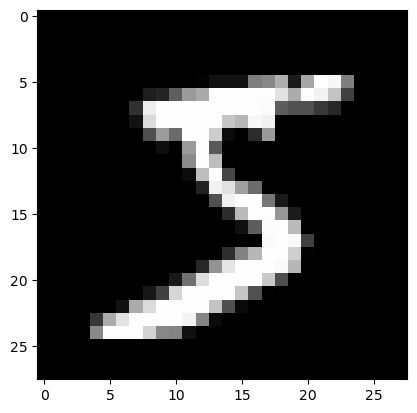

In [4]:
# Visualizing the data
print(f"Label: {y_train[0]}")
plt.imshow(X_train[0], cmap='gray')

In [5]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

In [6]:
X_train = torch.reshape(X_train, (60000,-1))

In [13]:
print(X_train.shape)

torch.Size([60000, 784])


In [7]:
# Making the Generator Neural Network
class Generator(nn.Module):
    def __init__(self, input_features, output_features, hidden_features=200):
        super().__init__()
        self.Layer1 = nn.Linear(in_features=input_features, out_features=hidden_features)
        self.act1 = nn.ReLU()
        self.Layer2 = nn.Linear(in_features=hidden_features, out_features=hidden_features)
        self.act2 = nn.ReLU()
        self.Layer3 = nn.Linear(in_features=hidden_features, out_features=output_features)
        self.act3 = nn.Sigmoid()
    
    def forward(self, x):
        return self.act3(self.Layer3(self.act2(self.Layer2(self.act1(self.Layer1(x))))))

In [8]:
# Creating an instance of the object Generator
generator_mnist = Generator(784,784)

In [17]:
# Making the Discriminator Neural Network
class Discriminator(nn.Module):
    def __init__(self, input_features, output_features=1, hidden_features=200):
        super().__init__()
        self.Layer1 = nn.Linear(in_features=input_features, out_features=hidden_features)
        self.act1 = nn.ReLU()
        self.Layer2 = nn.Linear(in_features=hidden_features, out_features=hidden_features)
        self.act2 = nn.ReLU()
        self.Layer3 = nn.Linear(in_features=hidden_features, out_features=output_features)
        self.act3 = nn.Sigmoid()
    def forward(self, x):
        return self.act3(self.Layer3(self.act2(self.Layer2(self.act1(self.Layer1(x))))))

In [18]:
# Creating an instance of object Discriminator
discriminator_mnist = Discriminator(784,1)

In [14]:
def loss_fn_discriminator(x_data, z_noise, m_samples):
  return (1 / m_samples) * np.sum(np.log(Discriminator(x_data)) + np.log(1 - Discriminator(Generator(z_noise))))

optimizer_discriminator = torch.optim.SGD(params=discriminator_mnist.parameters(), lr=0.01)

In [15]:
def loss_fn_generator(z_noise, m_samples):
  return (1 / m_samples) * np.sum(1 - Discriminator(Generator(z_noise)))

optimizer_generator = torch.optim.SGD(params=generator_mnist.parameters(), lr=0.01)

In [19]:
epochs = 1000
m_samples = 100
k = 100
for epoch in range(epochs):
  discriminator_mnist.train()
  generator_mnist.train()
  for k in range(100):
    discriminator_mnist.train()
    noise_samples = torch.randn(100, 784)
    indices = torch.randperm(len(X_train))[:100]
    data_samples = X_train[indices]
    loss_discriminator = -loss_fn_discriminator(data_samples, noise_samples, m_samples)
    optimizer_discriminator.zero_grad()
    loss_discriminator.backward() 
    optimizer_discriminator.step()
  
  noise_samples = torch.randn(100, 784)
  loss_generator = loss_fn_generator(noise_samples, m_samples)
  optimizer_generator.zero_grad()
  loss_generator.backward()
  optimizer_generator.step() 

TypeError: empty(): argument 'size' failed to unpack the object at pos 2 with error "type must be tuple of ints,but got Tensor"